In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from community import community_louvain
import community

In [2]:
data = pd.read_csv('atp_matches_2000.csv')
data

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2000-717,Orlando,Clay,32,A,20000501,1,102179,NaN,NaN,...,15.0,13.0,4.0,110.0,59.0,49.0,31.0,17.0,4.0,4.0
1,2000-717,Orlando,Clay,32,A,20000501,2,103602,NaN,Q,...,6.0,0.0,0.0,57.0,24.0,13.0,17.0,10.0,4.0,9.0
2,2000-717,Orlando,Clay,32,A,20000501,3,103387,NaN,NaN,...,0.0,2.0,2.0,65.0,39.0,22.0,10.0,8.0,6.0,10.0
3,2000-717,Orlando,Clay,32,A,20000501,4,101733,NaN,NaN,...,12.0,4.0,6.0,104.0,57.0,35.0,24.0,15.0,6.0,11.0
4,2000-717,Orlando,Clay,32,A,20000501,5,101727,4.0,NaN,...,1.0,0.0,3.0,47.0,28.0,17.0,10.0,8.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3359,2000-D082,Davis Cup G2 QF: VEN vs URU,Hard,4,D,20000204,4,103286,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3360,2000-D083,Davis Cup WG R1: ZIM vs USA,Hard,4,D,20000204,1,101736,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3361,2000-D083,Davis Cup WG R1: ZIM vs USA,Hard,4,D,20000204,2,101647,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3362,2000-D083,Davis Cup WG R1: ZIM vs USA,Hard,4,D,20000204,3,101736,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#drop non relevant variables
df = data[['tourney_name','surface','tourney_level','tourney_date','winner_name','winner_hand','winner_ioc','winner_age','winner_rank','loser_name','loser_hand','loser_ioc','loser_age','loser_rank','score','round']]
df

,tourney_name,surface,tourney_level,tourney_date,winner_name,winner_hand,winner_ioc,winner_age,winner_rank,loser_name,loser_hand,loser_ioc,loser_age,loser_rank,score,round
0,Orlando,Clay,A,20000501,Antony Dupuis,R,FRA,27.181383,113.0,Andrew Ilie,R,AUS,24.035592,50.0,3-6 7-6(6) 7-6(4),R32
1,Orlando,Clay,A,20000501,Fernando Gonzalez,R,CHI,19.756331,352.0,Cecil Mamiit,R,PHI,23.843943,139.0,6-2 7-5,R32
2,Orlando,Clay,A,20000501,Paradorn Srichaphan,R,THA,20.881588,103.0,Sebastien Lareau,R,CAN,27.011636,133.0,6-1 6-3,R32
3,Orlando,Clay,A,20000501,Jan Siemerink,L,NED,30.047912,107.0,Justin Gimelstob,R,USA,23.260780,95.0,4-6 6-2 7-5,R32
4,Orlando,Clay,A,20000501,Jason Stoltenberg,R,AUS,30.075291,74.0,Alex Lopez Moron,R,ESP,29.423682,111.0,6-1 6-4,R32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3359,Davis Cup G2 QF: VEN vs URU,Hard,D,20000204,Yohny Romero,R,VEN,21.169062,554.0,Alejandro Olivera,R,URU,22.959617,794.0,6-3 6-0,RR
3360,Davis Cup WG R1: ZIM vs USA,Hard,D,20000204,Andre Agassi,R,USA,29.757700,1.0,Wayne Black,R,ZIM,26.212183,156.0,7-5 6-3 7-5,RR
3361,Davis Cup WG R1: ZIM vs USA,Hard,D,20000204,Byron Black,R,ZIM,30.318960,71.0,Chris Woodruff,R,USA,27.077344,37.0,7-6(2) 6-3 6-2,RR
3362,Davis Cup WG R1: ZIM vs USA,Hard,D,20000204,Andre Agassi,R,USA,29.757700,1.0,Byron Black,R,ZIM,30.318960,71.0,6-2 6-3 7-6(4),RR


In [4]:
#check all unique values since we want to reduce the Davis Cup into just "Davis cup"
df.tourney_name.unique()

array(['Orlando', 'Atlanta', 'London', 'US Open', 'St. Petersburg',
       'Memphis', 'Indian Wells Masters', 'Rotterdam', 'Hong Kong',
       'Casablanca', 'Australian Open', 'Mexico City', 'Vienna',
       "'s-Hertogenbosch", 'Adelaide', 'Scottsdale', 'Moscow', 'Umag',
       'Miami Masters', 'Mallorca', 'San Marino', 'Bucharest', 'Lyon',
       'Halle', 'Santiago', 'Tashkent', 'St. Poelten', 'Auckland',
       'Wimbledon', 'Los Angeles', 'Cincinnati Masters', 'Canada Masters',
       'Barcelona', 'San Jose', 'Stockholm', 'Delray Beach', 'Marseille',
       'Dubai', 'Estoril', 'Nottingham', 'Shanghai', 'Chennai', 'Munich',
       'Gstaad', 'Sydney Olympics', 'Rome Masters', 'Hamburg Masters',
       'Monte Carlo Masters', 'Washington', 'Indianapolis', 'Kitzbuhel',
       "Queen's Club", 'Newport', 'Amsterdam', 'Bastad', 'Copenhagen',
       'Stuttgart Outdoor', 'Doha', 'Palermo', 'Toulouse', 'Basel',
       'Tokyo', 'Stuttgart Masters', 'Paris Masters', 'Bogota',
       'Roland Garro

In [5]:
#rename all the Davis Cup
df['tourney_name'] = df['tourney_name'].str.replace('Davis Cup.*', 'Davis Cup', regex=True)

<ipython-input-5-fa29a22475a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tourney_name'] = df['tourney_name'].str.replace('Davis Cup.*', 'Davis Cup', regex=True)


In [6]:
df['tourney_name'].nunique()

72

In [7]:
#checking null values
df.isnull().sum(axis = 0)

tourney_name       0
surface            0
tourney_level      0
tourney_date       0
winner_name        0
winner_hand        1
winner_ioc         0
winner_age         1
winner_rank      164
loser_name         0
loser_hand         0
loser_ioc          0
loser_age          0
loser_rank       206
score              0
round              0
dtype: int64

In [8]:
print(df.dtypes)

tourney_name      object
surface           object
tourney_level     object
tourney_date       int64
winner_name       object
winner_hand       object
winner_ioc        object
winner_age       float64
winner_rank      float64
loser_name        object
loser_hand        object
loser_ioc         object
loser_age        float64
loser_rank       float64
score             object
round             object
dtype: object


### Visualization

Text(0.5, 1.0, 'surface')

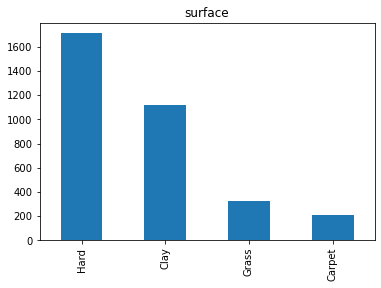

In [9]:
#surface
df.surface.value_counts().plot(kind='bar')
plt.title('surface')

A: ATP Finals (Men's Tour) or WTA Finals (Women's Tour) - this is the year-end championship for the top players in the world.

M: Masters 1000 (Men's Tour) or Premier Mandatory (Women's Tour) - these are the highest level of tournaments outside of the Grand Slams, with a prize money pool of over $7 million.

G: Grand Slam - these are the four most prestigious and highly-ranked tournaments in tennis: Australian Open, French Open, Wimbledon, and US Open.

D: Davis Cup (Men's Team Event) or Fed Cup (Women's Team Event) - these are team competitions between nations, with matches played throughout the year.

F: ATP 500 (Men's Tour) or Premier 5 (Women's Tour) - these are tournaments with a prize money pool of around $2 million.

Text(0.5, 1.0, 'tourney_level')

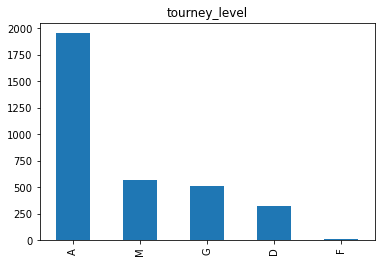

In [10]:
#tournament level
df.tourney_level.value_counts().plot(kind='bar')
plt.title('tourney_level')

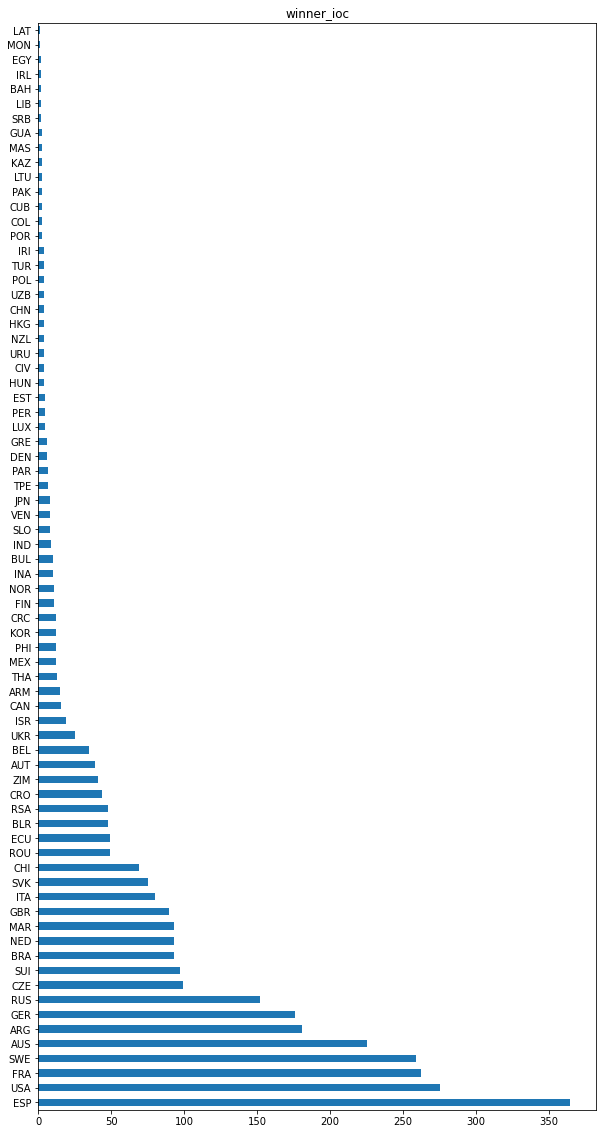

In [11]:
#tournament level
plt.figure(figsize=(10,20))

df.winner_ioc.value_counts().plot(kind='barh')
plt.title('winner_ioc')
plt.show()

In [12]:
df.winner_name.value_counts().head(10)

Magnus Norman          69
Marat Safin            68
Yevgeny Kafelnikov     67
Gustavo Kuerten        64
Lleyton Hewitt         61
Tim Henman             58
Alex Corretja          55
Thomas Enqvist         51
Juan Carlos Ferrero    46
Sebastien Grosjean     44
Name: winner_name, dtype: int64

In [13]:
df.loser_name.value_counts().head(10)

Yevgeny Kafelnikov    35
Fernando Vicente      32
Francisco Clavet      30
Roger Federer         30
Stefan Koubek         30
Karim Alami           29
Mariano Zabaleta      29
Dominik Hrbaty        29
Nicolas Lapentti      29
Sjeng Schalken        28
Name: loser_name, dtype: int64

#### create dataset showing that each player has faced each other

In [14]:
vs = df[['winner_name','loser_name']]
vs

,winner_name,loser_name
0,Antony Dupuis,Andrew Ilie
1,Fernando Gonzalez,Cecil Mamiit
2,Paradorn Srichaphan,Sebastien Lareau
3,Jan Siemerink,Justin Gimelstob
4,Jason Stoltenberg,Alex Lopez Moron
...,...,...
3359,Yohny Romero,Alejandro Olivera
3360,Andre Agassi,Wayne Black
3361,Byron Black,Chris Woodruff
3362,Andre Agassi,Byron Black


In [15]:
# safe to excel for visualization in Gephi
vs.to_excel('versus.xlsx')

#### create dataset showing that each player has joined the same competition each other

In [16]:
new_df = pd.DataFrame(columns=['tourney_name', 'players'])

# loop through each row in the original dataset
for index, row in df.iterrows():
    #winner
    new_df = new_df.append({'tourney_name': row['tourney_name'], 'players': row['winner_name']}, ignore_index=True)
    #loser
    new_df = new_df.append({'tourney_name': row['tourney_name'], 'players': row['loser_name']}, ignore_index=True)

# save the new dataframe to a new CSV file
new_df.to_csv('new_dataset.csv', index=False)
new_df

,tourney_name,players
0,Orlando,Antony Dupuis
1,Orlando,Andrew Ilie
2,Orlando,Fernando Gonzalez
3,Orlando,Cecil Mamiit
4,Orlando,Paradorn Srichaphan
...,...,...
6723,Davis Cup,Chris Woodruff
6724,Davis Cup,Andre Agassi
6725,Davis Cup,Byron Black
6726,Davis Cup,Chris Woodruff


In [17]:
new_df['players'].nunique()

486

In [18]:
# Group the players by their tournament and join them into a single string
tourney = new_df.groupby('tourney_name')['players'].apply(lambda x: ', '.join(x)).reset_index()
tourney.columns = ['tourney_name', 'players']
tourney

,tourney_name,players
0,'s-Hertogenbosch,"Magnus Gustafsson, Jan Boruszewski, Jan Siemer..."
1,Adelaide,"Thomas Enqvist, Arnaud Clement, Roger Federer,..."
2,Amsterdam,"Christian Ruud, Nicolas Lapentti, Federico Bro..."
3,Atlanta,"Andre Agassi, Xavier Malisse, Jiri Vanek, Just..."
4,Auckland,"Tommy Haas, Jeff Tarango, Juan Balcells, Franc..."
...,...,...
67,US Open,"Andre Agassi, Alex Kim, Arnaud Clement, Gaston..."
68,Umag,"Mariano Puerta, Julian Alonso, Ivan Ljubicic, ..."
69,Vienna,"Nicolas Escude, Marat Safin, Stefan Koubek, Cy..."
70,Washington,"Fernando Meligeni, Juan Antonio Marin, Jiri Va..."


### Louvain Community Detection

In [19]:
G = nx.Graph()
for i, row in tourney.iterrows():
    players = row['players'].split(', ')
    for j in range(len(players)):
        for k in range(j+1, len(players)):
            G.add_edge(row['tourney_name'], players[j], weight=1)
            G.add_edge(row['tourney_name'], players[k], weight=1)
            
partition = community_louvain.best_partition(G)

In [20]:
for com in set(partition.values()):
    print("Community", com)
    members = [nodes for nodes in partition.keys() if partition[nodes] == com]
    print(members)

Community 0
["'s-Hertogenbosch", 'Jan Boruszewski', 'Jan Siemerink', 'Orlin Stanoytchev', 'Raemon Sluiter', 'Dennis Van Scheppingen', 'Marc Kevin Goellner', 'Christophe Rochus', 'Andrei Stoliarov', 'Paradorn Srichaphan', 'Lorenzo Manta', 'Karsten Braasch', 'Rogier Wassen', 'Peter Wessels', 'Laurence Tieleman', 'John Van Lottum', 'Adelaide', 'Jan Michael Gambill', 'Andrew Ilie', 'Scott Draper', 'Richard Fromberg', 'Todd Woodbridge', 'James Sekulov', 'Gianluca Pozzi', 'Mark Woodforde', 'Dejan Petrovic', 'Christian Vinck', 'Paul Goldstein', 'Jason Stoltenberg', 'Paul Baccanello', 'Jean Rene Lisnard', 'Michael Tebbutt', 'Ronald Agenor', 'Adrian Voinea', 'Andre Sa', 'Tomas Behrend', 'Thierry Guardiola', 'Atlanta', 'Xavier Malisse', 'Justin Gimelstob', 'Magnus Larsson', 'Fredrik Jonsson', 'Eric Taino', 'Chris Woodruff', 'Kevin Kim', 'Davide Sanguinetti', 'Tomas Zib', 'Michael Russell', 'Levar Harper Griffith', 'Australian Open', 'Noam Okun', 'Jim Courier', 'Leander Paes', 'Jacobo Diaz', 'Seb

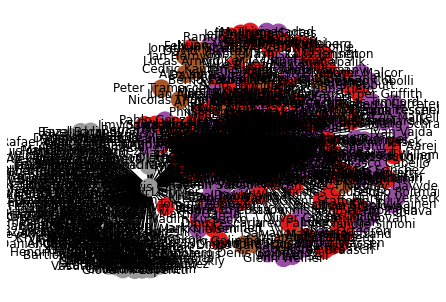

In [21]:
# Plot the graph with nodes colored according to their community
node_color = [partition.get(node) for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=node_color, cmap=plt.cm.Set1, with_labels=True)
plt.show()

In [22]:
# Save the graph as a graphml file
nx.write_graphml(G, 'tourney_graph.graphml')
nx.write_gexf(G, "tourney_graph gexf.gexf")

In [23]:
# Compute the community structure using the Louvain algorithm
partition = community.best_partition(G)

# Assign a color to each node based on its community membership
colors = {c: i for i, c in enumerate(set(partition.values()))}
node_colors = [colors[partition[n]] for n in G.nodes()]

# Add the node_color attribute to the nodes in the graph
for i, node in enumerate(G.nodes()):
    G.nodes[node]["node_color"] = node_colors[i]

# Export the graph to a GEXF file
nx.write_gexf(G, "tourney_graph color.gexf")

### Label Propagation

In [24]:
# Create empty graph
G = nx.Graph()

# Add edges
for idx, row in tourney.iterrows():
    players = row['players'].split(", ")
    for player in players:
        G.add_edge(row['tourney_name'], player)

# Run label propagation algorithm
communities = nx.algorithms.community.label_propagation.label_propagation_communities(G)

# Print communities as a list
for i, community in enumerate(communities):
    print("Community {}: {}".format(i+1, list(community)))


Community 1: ['Takao Suzuki', 'Andy Fahlke', 'Francisco Cabello', 'Diego Nargiso', 'Bernd Karbacher', 'Pablo Gonzalez', 'Stockholm', 'Mahesh Bhupathi', 'Ronald Agenor', 'Delray Beach', 'Hernan Gumy', 'Mexico City', 'Umag', 'Wayne Black', 'Attila Savolt', 'Mikhail Youzhny', 'Marseille', 'David Prinosil', 'George Bastl', 'Alex Witt', 'Bastad', 'Bob Bryan', 'Hector Moretti', "'s-Hertogenbosch", 'Paul Harsanyi', 'Mikael Tillstrom', 'Richey Reneberg', 'Jaime Cortes', 'Dennis Van Scheppingen', 'Orlando', 'Joseph Sirianni', 'Michael Sell', 'Jakub Herm Zahlava', 'Jonathan Erlich', 'Federico Luzzi', 'Roberto Carretero', 'Michael Russell', 'Mounir El Aarej', 'Werner Eschauer', 'Jeff Tarango', 'Mehdi Tahiri', 'Juan Ignacio Chela', 'Christophe Rochus', 'Cedric Kauffmann', 'Auckland', 'Paul Kilderry', 'Jan Kroslak', 'Alex Kim', 'Alexandre Simoni', 'Chris Woodruff', 'Michael Chang', 'Fredrik Jonsson', 'Marc Kevin Goellner', 'Jurgen Melzer', 'Atlanta', 'Jan Siemerink', 'Yong Il Yoon', 'Christian Vinc

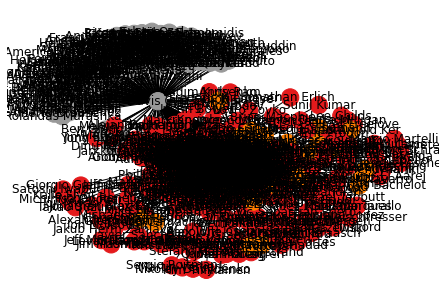

In [25]:
# Create a dictionary to map nodes to their community
node_community = {}
for i, community in enumerate(communities):
    for node in community:
        node_community[node] = i

# Create a list of colors for the nodes based on their community
colors = []
for node in G.nodes():
    colors.append(node_community[node])

# Draw the graph with nodes colored by their community
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=colors, cmap=plt.get_cmap("Set1"), with_labels=True)

# Show the plot
plt.show()

In [34]:
nx.write_gexf(G, 'tourney_label_propagation.gexf')

In [35]:
# Apply label propagation algorithm
communities = nx.algorithms.community.label_propagation.label_propagation_communities(G)

# Assign a color to each node based on its community membership
colors = {}
for i, comm in enumerate(communities):
    for node in comm:
        colors[node] = i

node_colors = [colors[n] for n in G.nodes()]

# Add the node_color attribute to the nodes in the graph
for i, node in enumerate(G.nodes()):
    G.nodes[node]["node_color"] = node_colors[i]

# Export the graph to a GEXF file
nx.write_gexf(G, "tourney_label_color.gexf")

In [36]:
# safe to excel for visualization in Gephi
tourney.to_excel('tourney.xlsx')

In [37]:
match_winner = data[['winner_name','loser_name']]
match_winner

,winner_name,loser_name
0,Antony Dupuis,Andrew Ilie
1,Fernando Gonzalez,Cecil Mamiit
2,Paradorn Srichaphan,Sebastien Lareau
3,Jan Siemerink,Justin Gimelstob
4,Jason Stoltenberg,Alex Lopez Moron
...,...,...
3359,Yohny Romero,Alejandro Olivera
3360,Andre Agassi,Wayne Black
3361,Byron Black,Chris Woodruff
3362,Andre Agassi,Byron Black


In [38]:
# save to excel for visualization in gephi
match_winner.to_excel('match_winner.xlsx')

In [39]:
# #all unique player names
# all_players = set(player['winner_name']).union(set(player['loser_name']))

# #adjacency matrix
# adj_matrix = np.zeros((len(all_players), len(all_players)), dtype=int)

# for index, row in player.iterrows():
#     winner = row['winner_name']
#     loser = row['loser_name']
#     adj_matrix[list(all_players).index(winner)][list(all_players).index(loser)] += 1

# adj_df = pd.DataFrame(adj_matrix, index=all_players, columns=all_players)
# adj_df

In [40]:
# save to excel for visualization in gephi
adj_df.to_excel('winner_loser.xlsx')

NameError: name 'adj_df' is not defined

In [41]:
player = data[['winner_name','loser_name','winner_ioc','loser_ioc']]
player

,winner_name,loser_name,winner_ioc,loser_ioc
0,Antony Dupuis,Andrew Ilie,FRA,AUS
1,Fernando Gonzalez,Cecil Mamiit,CHI,PHI
2,Paradorn Srichaphan,Sebastien Lareau,THA,CAN
3,Jan Siemerink,Justin Gimelstob,NED,USA
4,Jason Stoltenberg,Alex Lopez Moron,AUS,ESP
...,...,...,...,...
3359,Yohny Romero,Alejandro Olivera,VEN,URU
3360,Andre Agassi,Wayne Black,USA,ZIM
3361,Byron Black,Chris Woodruff,ZIM,USA
3362,Andre Agassi,Byron Black,USA,ZIM


In [42]:
names = pd.concat([player['winner_name'], player['loser_name']])
countries = pd.concat([player['winner_ioc'], player['loser_ioc']])
player_country = pd.DataFrame({'player_name': names, 'player_country': countries})
player_country.drop_duplicates(inplace=True)
player_country.reset_index(drop=True,inplace=True)

player_country

,player_name,player_country
0,Antony Dupuis,FRA
1,Fernando Gonzalez,CHI
2,Paradorn Srichaphan,THA
3,Jan Siemerink,NED
4,Jason Stoltenberg,AUS
...,...,...
481,Dias Doskarayev,KAZ
482,Ekkarin Pisuth Arnonth,THA
483,James Shortall,NZL
484,Joao Cunha Silva,POR


In [43]:
player_country.reset_index(inplace=True)
player_country

,index,player_name,player_country
0,0,Antony Dupuis,FRA
1,1,Fernando Gonzalez,CHI
2,2,Paradorn Srichaphan,THA
3,3,Jan Siemerink,NED
4,4,Jason Stoltenberg,AUS
...,...,...,...
481,481,Dias Doskarayev,KAZ
482,482,Ekkarin Pisuth Arnonth,THA
483,483,James Shortall,NZL
484,484,Joao Cunha Silva,POR


In [44]:
# save to excel for visualization in gephi
player_country.to_excel('player_country.xlsx')

In [45]:
merged_df = pd.merge(match_winner, player_country, left_on='winner_name', right_on='player_name')

merged_df.rename(columns={'index': 'source'}, inplace=True)

merged_df.drop(['player_name', 'player_country'], axis=1, inplace=True)

final_df = pd.merge(merged_df, player_country, left_on='loser_name', right_on='player_name')

final_df.rename(columns={'index': 'target'}, inplace=True)

final_df.drop(['player_name', 'player_country'], axis=1, inplace=True)

final_df

,winner_name,loser_name,source,target
0,Antony Dupuis,Andrew Ilie,0,25
1,Sargis Sargsian,Andrew Ilie,20,25
2,Michael Chang,Andrew Ilie,24,25
3,Thomas Enqvist,Andrew Ilie,38,25
4,Wayne Ferreira,Andrew Ilie,44,25
...,...,...,...,...
3359,Hazuan Hizan,Seyed Akbar Taheri Rahaghi,327,479
3360,Selvam Veerasingam,Ramin Raziyani,326,275
3361,Andrey Dernovskiy,Joao Cunha Silva,329,484
3362,Orest Tereshchuk,Joao Cunha Silva,330,484


In [46]:
# save to excel for visualization in gephi
final_df.to_excel('source_target.xlsx')

## For Degree Distribution and Link Prediction

##### vs graph

In [47]:
cc = pd.read_excel('directed vs edges.xlsx')
cc

,Source,Target,Type,Id,Label,Interval,Weight
0,Lars Burgsmuller,Martin Damm,Directed,0,NaN,NaN,1.0
1,Lars Burgsmuller,Jiri Novak,Directed,1,NaN,NaN,1.0
2,Alex Obrien,Marcos Ondruska,Directed,2,NaN,NaN,1.0
3,Alex Obrien,Andrew Ilie,Directed,3,NaN,NaN,1.0
4,Alex Obrien,Ivan Ljubicic,Directed,4,NaN,NaN,1.0
...,...,...,...,...,...,...,...
3071,Diego Nargiso,Oliver Freelove,Directed,3071,NaN,NaN,1.0
3072,Diego Nargiso,Sergi Bruguera,Directed,3072,NaN,NaN,1.0
3073,Diego Nargiso,Karim Alami,Directed,3073,NaN,NaN,1.0
3074,Diego Nargiso,Adrian Voinea,Directed,3074,NaN,NaN,1.0


In [48]:
# Create a multi-index with all unique cities
cities = cc['Source'].unique()
mi = pd.MultiIndex.from_product([cities, cities], names=['first_city', 'second_city'])

# Create a new empty dataframe for the connections
connections = pd.DataFrame({'link': 0}, index=mi)

# Set the connection value to 1 for all existing connections
cc['link'] = 1
connections.update(cc.set_index(['Source', 'Target'])['link'])

# Reset the index and rename the columns
connections = connections.reset_index().rename(columns={'first_city': 'Player One', 'second_city': 'Player Two'})

# Print the connections dataframe
connections

,Player One,Player Two,link
0,Lars Burgsmuller,Lars Burgsmuller,0.0
1,Lars Burgsmuller,Alex Obrien,0.0
2,Lars Burgsmuller,Markus Hipfl,0.0
3,Lars Burgsmuller,Mariano Puerta,0.0
4,Lars Burgsmuller,Goran Ivanisevic,0.0
...,...,...,...
110219,Jean Francois Bachelot,Hyung Taik Lee,0.0
110220,Jean Francois Bachelot,Vasilis Mazarakis,0.0
110221,Jean Francois Bachelot,Frederic Niemeyer,0.0
110222,Jean Francois Bachelot,Diego Nargiso,0.0


In [49]:
# save to excel for further analysis
connections.to_excel('player one_player two.xlsx')

##### tourney graph

In [50]:
cp = pd.read_excel('cup-player edges.xlsx')
cp

,Source,Target,Type,Id,Label,Interval,Weight
0,Rome Masters,Slava Dosedel,Undirected,1,NaN,NaN,1.0
1,Casablanca,Mounir El Aarej,Undirected,2,NaN,NaN,1.0
2,Copenhagen,Tomas Behrend,Undirected,3,NaN,NaN,2.0
3,Washington,Fernando Meligeni,Undirected,4,NaN,NaN,2.0
4,Miami Masters,Paul Goldstein,Undirected,5,NaN,NaN,2.0
...,...,...,...,...,...,...,...
3362,Miami Masters,Jerome Golmard,Undirected,3363,NaN,NaN,2.0
3363,Moscow,Alberto Martin,Undirected,3364,NaN,NaN,2.0
3364,Los Angeles,Justin Gimelstob,Undirected,3365,NaN,NaN,4.0
3365,Lyon,Andrei Pavel,Undirected,3366,NaN,NaN,1.0


In [51]:
# # Create a multi-index with all unique cities
# cities = cp['Source'].unique()
# mi = pd.MultiIndex.from_product([cities, cities], names=['first_city', 'second_city'])

# # Create a new empty dataframe for the connections
# connections = pd.DataFrame({'link': 0}, index=mi)

# # Set the connection value to 1 for all existing connections
# cp['link'] = 1
# connections.update(cc.set_index(['Source', 'Target'])['link'])

# # Reset the index and rename the columns
# connections = connections.reset_index().rename(columns={'first_city': 'Tourney', 'second_city': 'Player'})

# # Print the connections dataframe
# connections

In [52]:
# # save to excel for further analysis
# connections.to_excel('tourney_player edges.xlsx')

In [57]:
# Get a list of all tournaments and players
tournaments = cp['Source'].unique()
players = cp['Target'].unique()

# Create a new dataframe to store the connections
data = []
for t in tournaments:
    for p in players:
        if ((cp['Source'] == t) & (cp['Target'] == p)).any():
            data.append([t, p, 1])
        else:
            data.append([t, p, 0])

new_db = pd.DataFrame(data, columns=['Source', 'Target', 'Connection'])
new_db

,Source,Target,Connection
0,Rome Masters,Slava Dosedel,1
1,Rome Masters,Mounir El Aarej,0
2,Rome Masters,Tomas Behrend,0
3,Rome Masters,Fernando Meligeni,1
4,Rome Masters,Paul Goldstein,0
...,...,...,...
34987,Hong Kong,Efe Ustundag,0
34988,Hong Kong,James Greenhalgh,0
34989,Hong Kong,Claude Ngoran,0
34990,Hong Kong,Jonathan Erlich,0


In [58]:
new_db.dtypes

Source        object
Target        object
Connection     int64
dtype: object

## Link prediction

In [68]:
#basic library
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#random forest
from sklearn.ensemble import RandomForestClassifier

#### Random Forest

In [69]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_db[['Source', 'Target']], new_db['Connection'], test_size=0.2, random_state=42)

# Encode the categorical variables using one-hot encoding
X_train = pd.get_dummies(X_train, columns=['Source', 'Target'])
X_test = pd.get_dummies(X_test, columns=['Source', 'Target'])

# Create the Random Forest classifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
test_acc = accuracy_score(y_test, y_pred)

print("MSE:", mse)
print("Accuracy:", test_acc)

MSE: 0.09444206315187884
Accuracy: 0.9055579368481211


### Rooted PageRank

In [71]:
# Load the network dataset as a directed graph
G = nx.from_pandas_edgelist(new_db, source='Source', target='Target', edge_attr='Connection', create_using=nx.DiGraph())

# Split the data into training and testing sets
train_edges, test_edges, train_labels, test_labels = train_test_split(list(G.edges()), [G[u][v]['Connection'] for u,v in G.edges()], test_size=0.2, random_state=42)

# Compute the Rooted PageRank scores for each node
rpr = nx.pagerank(G, alpha=0.85, personalization=None, max_iter=30, tol=1e-06, nstart=None, weight='weight', dangling=None)

# Predict the probability of a link for each test edge
predictions = []
for u, v in test_edges:
    pred = rpr[u] * rpr[v]
    predictions.append(pred)

# Convert the probabilities to binary predictions
binary_predictions = [int(p > 0.5) for p in predictions]

# Compute the accuracy and mean squared error of the predictions
accuracy = accuracy_score(test_labels, binary_predictions)
mse = mean_squared_error(test_labels, predictions)

print("Accuracy: ", accuracy)
print("MSE: ", mse)

Accuracy:  0.9041291613087584
MSE:  0.09587027569795334


### SimRank

In [73]:
# Load data into a directed graph
df = new_db.copy()
G = nx.from_pandas_edgelist(df, 'Source', 'Target', edge_attr='Connection', create_using=nx.DiGraph())

# Split edges into training and test sets
edges = list(G.edges(data=True))
np.random.shuffle(edges)
train_edges = edges[:int(len(edges)*0.8)]
test_edges = edges[int(len(edges)*0.8):]

# Train the SimRank model
simrank_scores = nx.simrank_similarity(G, max_iterations=10)

# Predict link formation for test set
y_true = [e[2]['Connection'] for e in test_edges]
y_pred = [simrank_scores[e[0]][e[1]] for e in test_edges]
y_pred = [1 if score > np.median(y_pred) else 0 for score in y_pred]

# Compute evaluation metrics
mse = mean_squared_error(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

print('Accuracy:', accuracy)
print('MSE:', mse)

Accuracy: 0.9039862837548222
MSE: 0.09601371624517788


In [61]:
# Export the new database to a CSV file
new_db.to_excel('Source-target edges.xlsx')

## link Prediction

#### Common Neighbors

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score